# Instructor Do: Random Forests

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Loans Encoded Data

In [2]:
# Define features set
file_path = Path("X_data.csv")
X = pd.read_csv(file_path)

In [3]:
# Define target vector
file_path = Path("y_data.csv")
y = pd.read_csv(file_path)

In [4]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [6]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [7]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [8]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)

In [9]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

/Users/felgtz/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## Making Predictions Using the Random Forest Model

In [10]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [11]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [12]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,50748,1926
Actual 1,2310,50651


Accuracy Score : 0.9598996544705827
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     52674
           1       0.96      0.96      0.96     52961

    accuracy                           0.96    105635
   macro avg       0.96      0.96      0.96    105635
weighted avg       0.96      0.96      0.96    105635



## Feature Importance

In [13]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.267700971649702, 'SYMPTOMS_MONTH'),
 (0.14468361498786417, 'INTUBADO'),
 (0.1331484286700584, 'UCI'),
 (0.10307541069979519, 'TIPO_PACIENTE'),
 (0.08066709960380979, 'NEUMONIA'),
 (0.0683689916831161, 'Age_Group'),
 (0.05734662043508818, 'CLASIFICACION_FINAL'),
 (0.028644582650991523, 'ENTIDAD_RES'),
 (0.025462697286201687, 'RESULTADO_LAB'),
 (0.016761138853486655, 'SECTOR'),
 (0.014891434573333489, 'OTRO_CASO'),
 (0.01159762185787172, 'HIPERTENSION'),
 (0.0087768364867569, 'DIABETES'),
 (0.006372318840255609, 'ORIGEN'),
 (0.005022153071712485, 'OBESIDAD'),
 (0.0033992828914468525, 'EMBARAZO'),
 (0.0032876634261785774, 'TABAQUISMO'),
 (0.0032519776472960515, 'RENAL_CRONICA'),
 (0.002923796656043199, 'SEXO'),
 (0.0027224438212345237, 'OTRA_COM'),
 (0.0023204464907116817, 'CARDIOVASCULAR'),
 (0.0021462888447658524, 'EPOC'),
 (0.0019699442484967535, 'INMUSUPR'),
 (0.0016809283082783154, 'INDIGENA'),
 (0.0016756511367610096, 'HABLA_LENGUA_INDIG'),
 (0.0014043631074537911, 'ASMA'),
 (0.

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

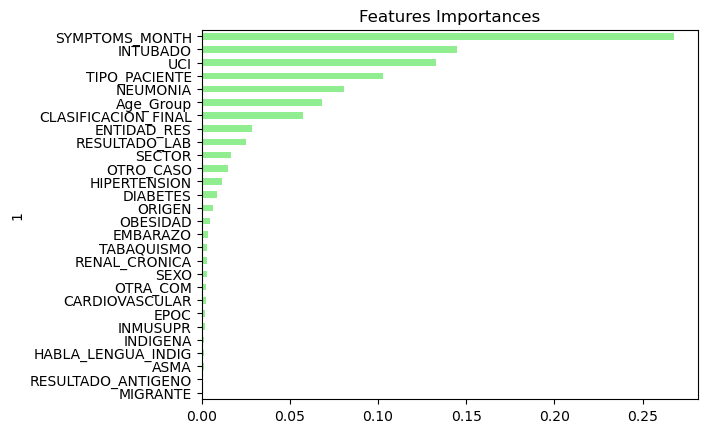

In [14]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)